In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:

# Load price data
eth_df = pd.read_csv('data/ETH-USD.csv', parse_dates=['Date'])
eth_df = eth_df.sort_values(by='Date')
eth_df.set_index('Date', inplace=True)

In [3]:

# Calculate returns
eth_df['SimpleReturns'] = eth_df['Adj Close'].pct_change()
eth_df['CumReturns'] = ((1+eth_df['SimpleReturns']).cumprod() - 1) * 100

In [4]:
eth_df.head()

,Open,High,Low,Close,Adj Close,Volume,SimpleReturns,CumReturns
Date,,,,,,,,
2020-11-26,570.514893,575.641479,485.497314,518.801147,518.801147,31104004592,NaN,NaN
2020-11-27,519.108093,530.777161,497.242615,517.493713,517.493713,16831105703,-0.002520,-0.252011
2020-11-28,517.597351,548.044861,508.125366,538.229797,538.229797,14770243833,0.040070,3.744913
2020-11-29,538.264587,576.602417,531.987549,575.758057,575.758057,15017517758,0.069725,10.978563
2020-11-30,575.757080,615.240540,571.537781,614.842529,614.842529,20276867833,0.067883,18.512176


# Tail Risk

Tail risk is the quantifiable level of risk that can be attributed to extreme investment outcomes. We are particularly interested in the tail risk that can occur on the left (negative) side of a distribution.

<img src='tail_risks.png'>

Image from https://seekingalpha.com/article/4225841-dancing-swans-tail-risks

# Historical Drawdown

In [22]:

# Historical drawdown estimates the percentage loss from the previous highest point of the portfolio
# How far have you fallen from your highest historical point?
cum_returns = eth_df['CumReturns'].dropna()
running_max = np.maximum.accumulate(cum_returns)
running_max[running_max < 1] = 1
drawdown = (cum_returns)/running_max - 1
print("The maximum drawdown was {:.2f}".format(np.amin(drawdown[drawdown > -1] * 100))+"%.")

The maximum drawdown was -72.43%.


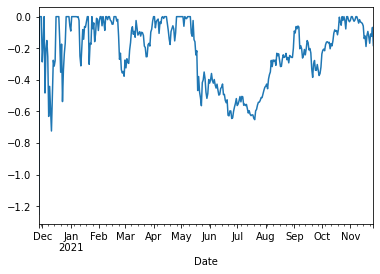

In [6]:
drawdown.plot()
plt.show()

# Value at Risk & Conditional Value at Risk

In [7]:

# Value at Risk (VaR) is an estimate of how much could be lost in a given time period, within a given confidence level
# How much could be lost during a given period historically? And how confident can we be of that historical estimate?
# Daily Var estimation below, since this is based on daily historical data
# Commonly quoted with quantiles such as 95, 99 and 99.9%

In [8]:

# Conditional Value at Risk (CVaR) is an estimate of the expected value of losses sustained on the occassions when the worst x% of scenarios happened
# In the worst x% of scenarios, how much on average could we have lost historically?
# Also known as Expected Shortfall


# Monte Carlo Simulation